<a href="https://colab.research.google.com/github/pranabsarma18/Machine-Learning-Technique/blob/main/Python%20Implementation/Week_2_programming_Kernel_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Week-2

**Note to Learners**: 

- For questions that involve plotting, just enter $0$ as the answer in the portal.
- For numerical questions, there are two parts. The first part expects you to compute some quantity, say a parameter of a machine learning model. The second part will require you to convert this quantity (if it is not a scalar) into a scalar so that it can be entered as the answer on the portal to the corresponding NAT question.



## Dataset

Run the cell given below to generate the data-matrix $\mathbf{X}$, which is of shape $(n, d)$, where $n$ denotes the number of samples and $d$ denotes the number of features. Ignore the vector $y$. You will be using this dataset for the rest of the assignment. Do not edit this cell.

In [2]:
from sklearn.datasets import make_circles

X, y = make_circles(n_samples=1000, factor=0.9, noise=0.2, random_state=0)

## Problem 1
Plot the dataset using matplotlib.

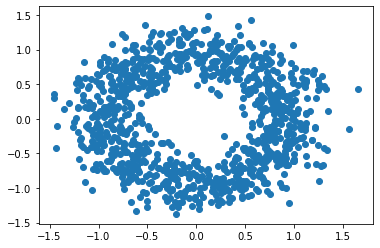

In [3]:
plt.scatter(X[:,0],X[:,1])

## Problem 2
How many samples are there in the dataset?


In [4]:
X.shape[0]

1000

## Problem 3
How many features are there in the dataset?

In [5]:
X.shape[1]

2

## Problem 4
Find the kernel matrix $K$ using the polynomial kernel with degree $2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [6]:
def pol_kernel(X,p):
  return (X @ X.T + 1)**p

In [7]:
K = pol_kernel(X,2)
K.shape

(1000, 1000)

In [8]:
n = X.shape[0]

In [9]:
K_square = K**2
K_square_sum = K_square.sum()
K_mss = np.sqrt(K_square_sum)/n
K_mss

2.096195646589988

## Problem 5
Find the kernel matrix $K$ using the Gaussian kernel with parameter $\sigma = 2$. 

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} (K_{ij})^2}
$$

In [10]:
# Enter your solution here
def rad_basis(x,y,sig):
  diff = x - y
  diff_len_square = (diff**2).sum()
  return np.exp(-diff_len_square/(2*(sig**2)))

In [11]:
K_gk = np.zeros((n,n))
for i in range(n):
  for j in range(n):
    K_gk[i][j] = rad_basis(X[i],X[j],2)
K_gk.shape

(1000, 1000)

In [12]:
K_gk_square = K_gk**2
K_gk_square_sum = K_gk_square.sum()
K_gk_mss = np.sqrt(K_gk_square_sum)/n
K_gk_mss

0.8079400085320029

## Problem 6
Find the center of the kernel matrix $K$ obtained in problem 2. Call this centered matrix $KC$.

<u>Conversion</u>

Enter the following quantity as your answer correct to two decimal places:

$$
\cfrac{1}{n} \sqrt{\sum \limits_{i = 1}^{n} \sum \limits_{j = 1}^{n} KC_{ij}^2}
$$

In [13]:
# Enter your solution here
def K_centered(K):
  N = K.shape[0]
  one_n = np.ones((N,N)) / N
  K = K - one_n.dot(K) - K.dot(one_n) + one_n.dot(K).dot(one_n)
  return K

In [14]:
KC = K_centered(K)
print(np.sqrt((KC ** 2).sum()) / (1000))

1.4517985176976844


## Problem 7
Find the projections (scalar) of all the data points on to the first two principal components obtained using polynomial kernel of degree 2.

<u>Conversion</u>

if $\alpha_1, \alpha_2, ..., \alpha_n$ are the prjections on the first PC and $\beta_1, \beta_2, ..., \beta_n$ are the projections on the second PC, enter the following quantity as your answer correct to two decimal places:

$$\sum_{i = 1}^{n} \alpha_i + \sum_{i = 1}^{n} \beta_i$$

In [15]:
n = X.shape[0]
n

1000

In [24]:
n = 1000
eigen_vals, eigen_vecs = np.linalg.eigh(KC)
lambda_1 = eigen_vals[-1]
lambda_2 = eigen_vals[-2]
w1 = eigen_vecs[:,-1]
w2 = eigen_vecs[:,-2]
w1 = np.expand_dims(w1,1)
w2 = np.expand_dims(w2,1)
alpha1 = w1/np.sqrt(lambda_1)
alpha2 = w2/np.sqrt(lambda_2)

In [25]:
alpha1[0]

array([0.00076004])

In [26]:
print(K.shape, alpha1.shape)
alphas = K @ alpha1
betas = K @ alpha2
(np.abs(alphas).sum() + np.abs(betas).sum())/n

(1000, 1000) (1000, 1)


1.7446893638954202